In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.preprocessing import FunctionTransformer
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,cross_val_predict,GridSearchCV
from sklearn.metrics import root_mean_squared_error

In [3]:
california = fetch_california_housing()

In [4]:
raw_data = pd.DataFrame(california.data,columns=california.feature_names)

In [5]:
raw_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
raw_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>, <Axes: >]], dtype=object)

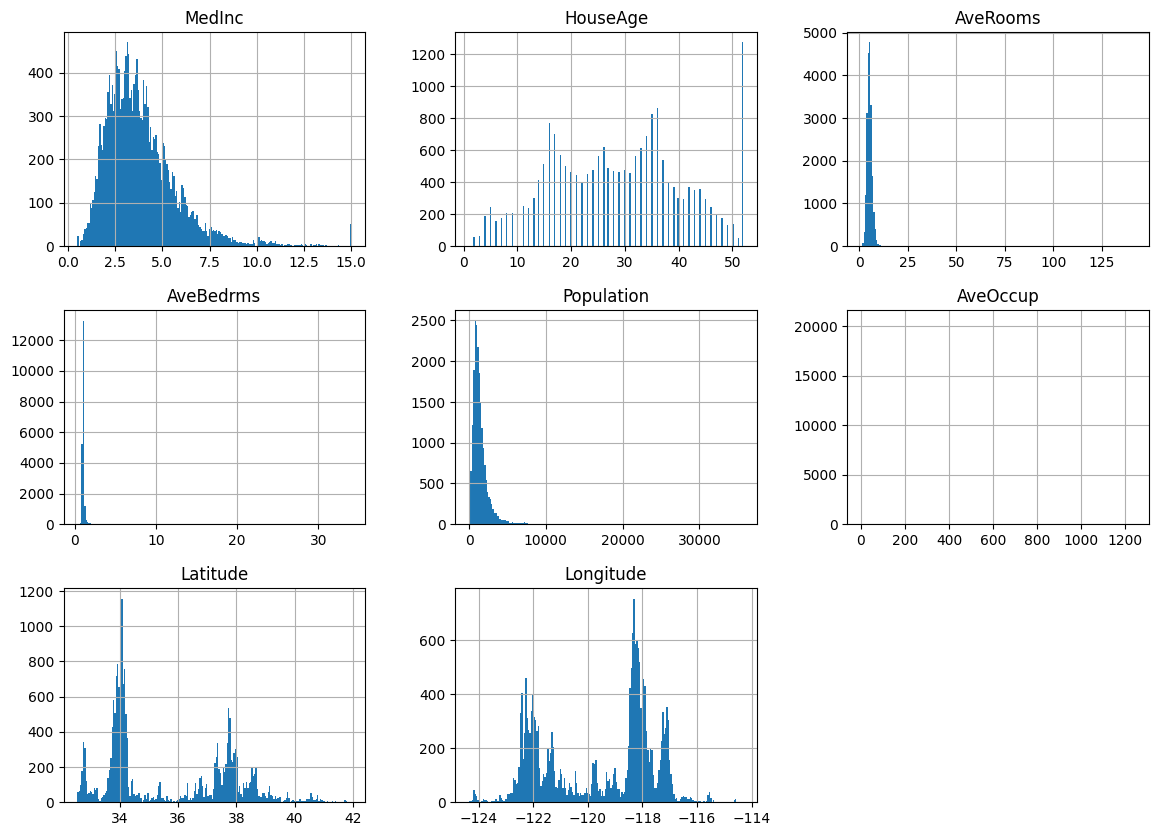

In [7]:
raw_data.hist(bins=200,figsize=(14,10))

In [8]:
dataset = raw_data.copy()

In [9]:
dataset['MedHouseVal'] = california.target

In [10]:
dataset = dataset[~(raw_data['MedInc'] == 15.000100)]

In [11]:
dataset = dataset[dataset['HouseAge'] != 52]

In [12]:
log_transformer = Pipeline(steps=[
    ('LogTransformer',FunctionTransformer(np.log1p, validate=True)),
    ('RobustScaler',RobustScaler())
])

In [13]:
standard = Pipeline(steps=[
    ('StandardScaler',StandardScaler())
])

In [14]:
X_train,X_test,y_train,y_test = train_test_split(dataset.drop('MedHouseVal',axis=1),dataset['MedHouseVal'],train_size=0.02,random_state=42)

In [15]:
X_train.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
2781,0.8585,15.0,4.826667,1.260000,949.0,3.163333,32.76,-114.63
11155,3.2546,16.0,4.045726,1.121272,1118.0,2.222664,33.83,-117.97
11853,1.7829,47.0,5.128878,1.088305,965.0,2.303103,39.80,-120.45
14020,3.1921,27.0,3.957627,1.023729,982.0,1.664407,32.74,-117.16
19825,2.7500,27.0,5.003086,0.996914,882.0,2.722222,36.55,-119.43


In [16]:
parameters = {
    'kernel' : ['linear','poly','rbf'],
    'C' : np.arange(1,10),
    'gamma' : np.arange(1,10)
}

In [17]:
preprocesor = ColumnTransformer(
    transformers=[
        ('A',log_transformer,['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup']),
        ('B',standard,['Latitude','Longitude'])
    ]
)

In [18]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocesor),
    ('model', GridSearchCV(SVR(),parameters,cv=4))
])


In [19]:
pipeline.fit(X_train,y_train)